# Day 14 - Data Prep

## Handling Skewness

Although we learned previously how to identify skewness, we never discussed how to address it. Skewness is a very common problem with data, and there are several good transformation fixes for it. While both negative and positive skewness are problems and have different fixes, positive skewness is more common. The primary solutions are as follows:

Positive skew corrections:

- Square root
- Cubed root
- Logarithmic:
    - log 10(x)
    - log e(x) (or natural log ln(x))
    - log 2(x)

Negative skew corrections:
- x^2
- x^3
- e(x)

#### Note
Before continuing, it is also worth noting that only the family of algorithms known as "linear" algorithms (e.g., OLS/MLR) require that skewness be corrected. Many other algorithms (e.g., CART/Decision Trees) do not depend on normal distributions.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/insurance.csv')
df.select_dtypes(np.number).skew() #Look at the skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

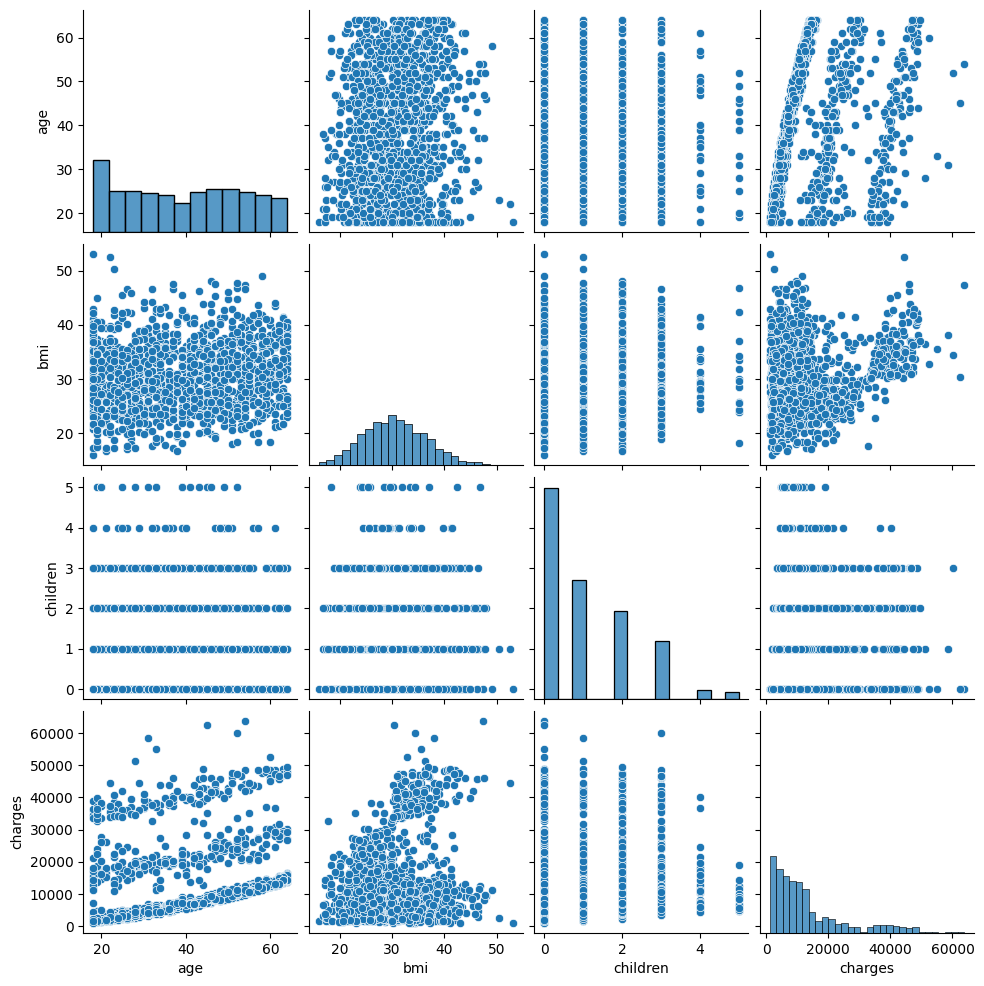

In [2]:
import seaborn as sns

sns.pairplot(df);
### Looking at the histograms

As you can see, there are many charges in the low ranges and few in the high ranges. Why do we care? What difference does this make?

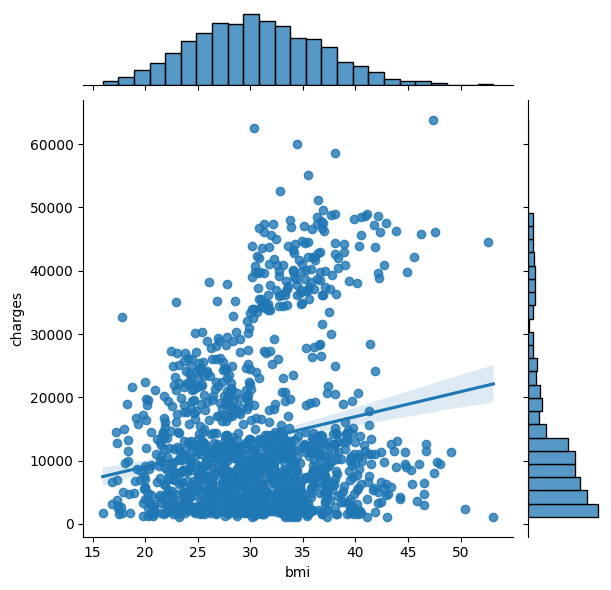

In [6]:
import matplotlib.pyplot as plt

g = sns.JointGrid(x=df.bmi, y=df.charges)
g = g.plot(sns.regplot, sns.histplot)

plt.show()

Notice that the regression line fits the overall positive trend of the data. However, once you get past a bmi of 25, the data begins to break into two separate trends (as a side note, this is caused by smokers). The line does not fit either trend very well. However, it's much closer to the lower chunk of dots were insurance charges are lower because that's where most of the data is.

In [8]:
### Let's make some transformations
df['chargesSR'] = np.sqrt(df['charges'])
df['chargesCR'] = np.cbrt(df['charges'])
df['chargesLN'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges,chargesSR,chargesCR,chargesLN
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002,25.654666,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,41.539768,11.994331,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,66.704288,16.447599,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,148.271611,28.013799,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,62.184043,15.695891,8.260197


age          0.055673
bmi          0.284047
children     0.938380
charges      1.515880
chargesSR    0.795863
chargesCR    0.515183
chargesLN   -0.090098
dtype: float64


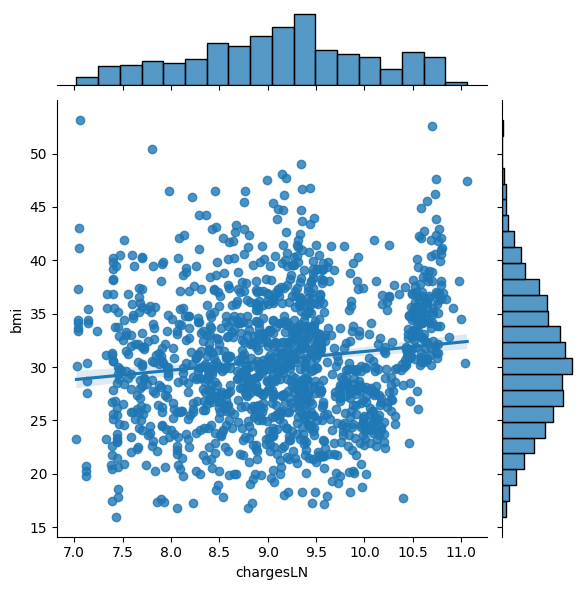

In [9]:
#Recalculate skewness
print(df.select_dtypes(np.number).skew())

g = sns.JointGrid(x=df.chargesLN, y=df.bmi)
g = g.plot(sns.regplot, sns.histplot)

plt.show()

#### Natural Log of 0

One more thing, although all of the charges data were positive numbers, sometimes you will have data that includes zeros. What is the natural log of zero? Let's find out:

In [10]:
np.log(0)

C:\Users\skous2\AppData\Local\Temp\ipykernel_13864\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

How do we handle this? Simple, we can add 1 to every row in the feature before calculating the natural log. In fact, this scenario is so common that the numpy package includes a function just for this purpose:

In [12]:
np.log1p(0)

0.0

### Negative Skewness

While less common than positive skewness, negative skewness also can be corrected, but using other transformations.

In [14]:
df = pd.read_csv('data/imdb_cleaned.csv')
print(df.isnull().sum())
print(df.shape)
df.head()

Unnamed: 0              0
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
Action                  0
Adventure               0
Sci-Fi                  0
Mystery                 0
Horror                  0
Thriller                0
Animation               0
Comedy                  0
Family                  0
Fantasy                 0
Drama                   0
Music                   0
Biography               0
Romance                 0
History                 0
Crime                   0
Western                 0
War                     0
Musical                 0
Sport                   0
dtype: int64
(1000, 33)


,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,...,False,False,False,False,False,False,False,False,False,False
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,...,False,False,False,False,False,False,False,False,False,False
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,...,False,False,False,False,False,False,False,False,False,False
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,...,False,False,False,False,False,False,False,False,False,False
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,...,False,False,False,False,False,False,False,False,False,False


In [15]:
### Dropping null columns just to see skewness
df.drop(columns=['Title', 'Description', 'Actors', 'Director', 'Genre', 'Rank'], inplace=True)
print(df.skew())
df.head()

Unnamed: 0             0.000000
Year                  -0.689879
Runtime (Minutes)      0.846713
Rating                -0.743142
Votes                  2.507918
Revenue (Millions)     2.592516
Metascore             -0.123887
Action                 0.858639
Adventure              1.101895
Sci-Fi                 2.342253
Mystery                2.563638
Horror                 2.356925
Thriller               1.541938
Animation              4.184759
Comedy                 0.986972
Family                 4.087995
Fantasy                2.652251
Drama                 -0.052096
Music                  6.691396
Biography              3.076068
Romance                2.066191
History                5.622047
Crime                  1.963338
Western               11.844193
War                    8.611542
Musical               14.056942
Sport                  7.261682
dtype: float64


,Unnamed: 0,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Sci-Fi,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,0,2014,121,8.1,757074,333.13,76.0,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1,2012,124,7.0,485820,126.46,65.0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2,2016,117,7.3,157606,138.12,62.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2016,108,7.2,60545,270.32,59.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2016,123,6.2,393727,325.02,40.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False


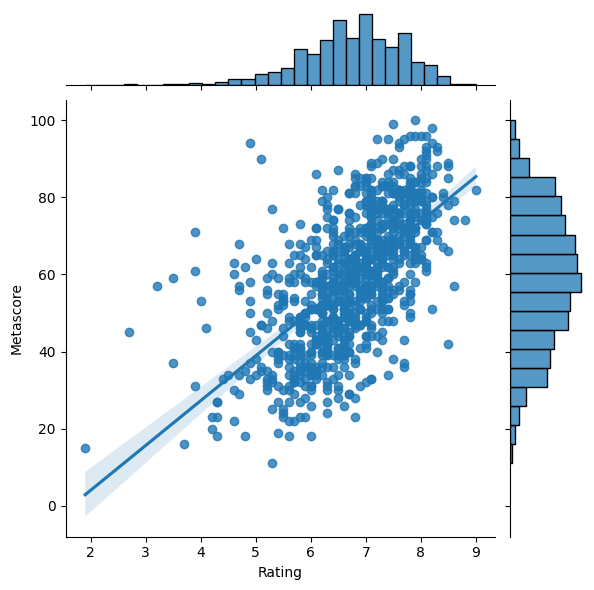

In [21]:
g = sns.JointGrid(x=df.Rating, y=df.Metascore)
g = g.plot(sns.regplot, sns.histplot)

plt.show()

In [17]:
df['Rating_2'] = df.Rating**2
df['Rating_3'] = df.Rating**3
df['Rating_e'] = np.exp(df.Rating)

df.skew()

Unnamed: 0             0.000000
Year                  -0.689879
Runtime (Minutes)      0.846713
Rating                -0.743142
Votes                  2.507918
Revenue (Millions)     2.592516
Metascore             -0.123887
Action                 0.858639
Adventure              1.101895
Sci-Fi                 2.342253
Mystery                2.563638
Horror                 2.356925
Thriller               1.541938
Animation              4.184759
Comedy                 0.986972
Family                 4.087995
Fantasy                2.652251
Drama                 -0.052096
Music                  6.691396
Biography              3.076068
Romance                2.066191
History                5.622047
Crime                  1.963338
Western               11.844193
War                    8.611542
Musical               14.056942
Sport                  7.261682
Rating_2              -0.196074
Rating_3               0.192624
Rating_e               1.786629
dtype: float64

## Outliers

#### The Empirical Rule (68-95-99.7)

The empirical rule (or“68-95-99.7”) simply states that any data that fits within a normal distribution will be within three standard deviations from the mean: 1st = 68% of the data, 2nd = 95%, 3rd = 99.7% (see image below). Therefore, any value that falls outside of +/- three standard deviations is an outlier.

In [24]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

# Loop through each column in the DataFrame except those that are (1) categorical, (2) empty, or (3) binary (0/1)
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
        # Calculate the theoretical min/max
        min = df[col].mean() - (df[col].std() * 3)
        max = df[col].mean() + (df[col].std() * 3)
        outliers.loc[col] = (min, df[col][df[col] < min].count(), max, df[col][df[col] > max].count())

# Let’s take a look to make sure it works
outliers

,min,count below,max,count above
weight_kg,-266.686193,0.0,389.442403,14.0
hp,-10.769242,0.0,148.686845,11.0
attack,-18.618783,0.0,174.334139,4.0
defense,-19.298739,0.0,165.316217,8.0
speed,-20.388404,0.0,153.057567,2.0
generation,-2.100872,0.0,9.481646,0.0


In [33]:
## Notice most are right skewed
quantdf = df.iloc[:,3:8]
quantdf.skew()

weight_kg    4.871044
hp           1.826591
attack       0.530811
defense      1.121058
speed        0.438918
dtype: float64

#### Winsorizing

Taking outliers and giving them a theoretical max or min value

In [58]:
# The Empirical Rule (68-95-99.7) with both identification and replacement

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

# Loop through each column in the DataFrame
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
        min = df[col].mean() - (df[col].std() * 3)
        max = df[col].mean() + (df[col].std() * 3)

        # Once the min/max is calculated for a column, take an inner loop through the row values of each column to replace values
        for i, value in enumerate(df[col]): 
            if value < min:      
                df.at[i, col + '_3std'] = min   # replace with min
                df.at[i, col + '_outlier'] = 1         # identify the record as an outlier for future filtering
            elif value > max:    
                df.at[i, col + '_3std'] = max   # replace with max
                df.at[i, col + '_outlier'] = 1
            else:                
                df.at[i, col + '_3std'] = value # use original value
                df.at[i, col + '_outlier'] = 0

# I don't like binary variables like "outlier" becoming floats; cast it back to an int
    for col in df.columns:
        if 'outlier' in col:
            df = df.astype({col: int})

# View the cleaned dataset:
df.sort_values(by='attack', ascending=False).head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary,...,hp_3std,hp_outlier,attack_3std,attack_outlier,defense_3std,defense_outlier,speed_3std,speed_outlier,generation_3std,generation_outlier
213,Heracross,bug,fighting,54.0,80,185,115,75,2,0,...,80.0,0,174.334139,1,115.0,0,75.0,0,2.0,0
797,Kartana,grass,steel,0.1,59,181,131,109,7,1,...,59.0,0,174.334139,1,131.0,0,109.0,0,7.0,0
382,Groudon,ground,NaN,950.0,100,180,160,90,3,1,...,100.0,0,174.334139,1,160.0,0,90.0,0,3.0,0
383,Rayquaza,dragon,flying,206.5,105,180,100,115,3,1,...,105.0,0,174.334139,1,100.0,0,115.0,0,3.0,0
444,Garchomp,dragon,ground,95.0,108,170,115,92,4,0,...,108.0,0,170.000000,0,115.0,0,92.0,0,4.0,0


In [59]:
quantdf2 = df[['weight_kg_3std', 'hp_3std', 'attack_3std', 'defense_3std', 'speed_3std']]
quantdf2.skew()

weight_kg_3std    2.490652
hp_3std           0.768176
attack_3std       0.506759
defense_3std      0.727692
speed_3std        0.398063
dtype: float64

### Tukey Box Plot
The Tukey box plot (or adjusted box plot) is a particular type of box plot intended for skewed distributions where the max/min (or whiskers) of the plot are defined as the lowest/highest data points that are still within 1.5 * interquartile range ([IQR] defined as Q3 - Q1)

In [63]:
# Tukey Box Plot
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

# Create a DataFrame to store the output
outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
    
    # Calculate the theoretical min/max based on 1.5
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        min = q1 - (1.5 * (q3 - q1))
        max = q3 + (1.5 * (q3 - q1))
    
        outliers.loc[col] = (min, df[col][df[col] < min].count(), max, df[col][df[col] > max].count())

# Let's take a look
outliers

,min,count below,max,count above
weight_kg,-74.7,0.0,148.5,80.0
hp,5.0,1.0,125.0,21.0
attack,-12.5,0.0,167.5,5.0
defense,-10.0,0.0,150.0,11.0
speed,-15.0,0.0,145.0,6.0
generation,-2.5,0.0,9.5,0.0


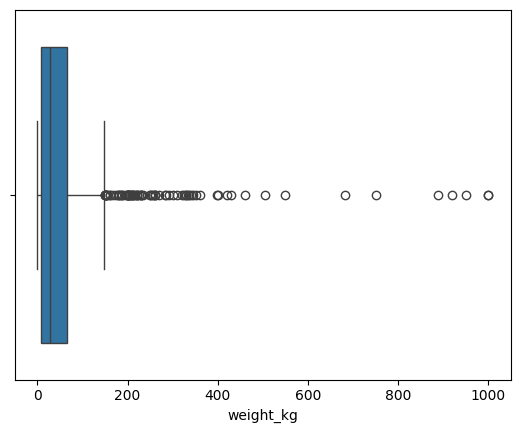

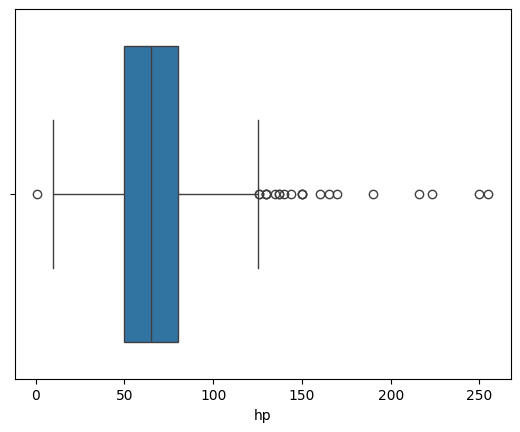

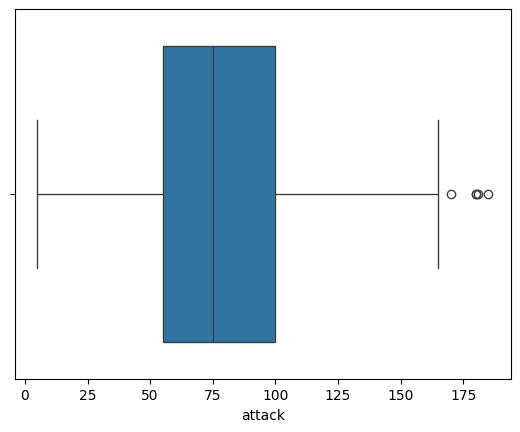

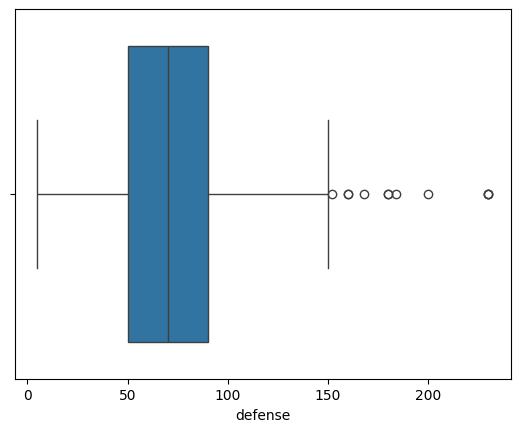

In [44]:
sns.boxplot(df.weight_kg, orient='h');
plt.show()
sns.boxplot(df.hp, orient='h');
plt.show()
sns.boxplot(df.attack, orient='h');
plt.show()
sns.boxplot(df.defense, orient='h');
plt.show()

#### Dropping values

We can drop outliers if applicable

In [69]:
dropweight = df.drop(index = df[df.weight_kg > 148.5].index)

In [71]:
print(len(df))
print(len(dropweight))

801
721


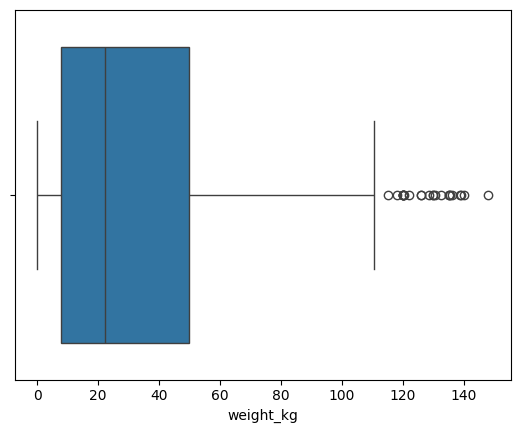

In [70]:
sns.boxplot(dropweight.weight_kg, orient='h');
plt.show()